In [97]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_data = pd.merge(ride_data, city_data, how="left", on=["city", "city"])
# Display the data table for preview
city_ride_data.head(5)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [98]:
# Obtain the x and y coordinates for each of the three city types
#Urban 
urban_cities = city_ride_data[city_ride_data["type"] =="Urban"]

urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"] 
urban_avg_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]

In [99]:
# Obtain the x and y coordinates for each of the three city types
#Suburban
suburban_cities = city_ride_data[city_ride_data["type"] =="Suburban"]

suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"] 
suburban_driver_count = suburban_cities.groupby(["city"]).count()["driver_count"]

In [100]:
# Obtain the x and y coordinates for each of the three city types
#Rural
rural_cities = city_ride_data[city_ride_data["type"] =="Rural"]

rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"] 
rural_driver_count = rural_cities.groupby(["city"]).count()["driver_count"]

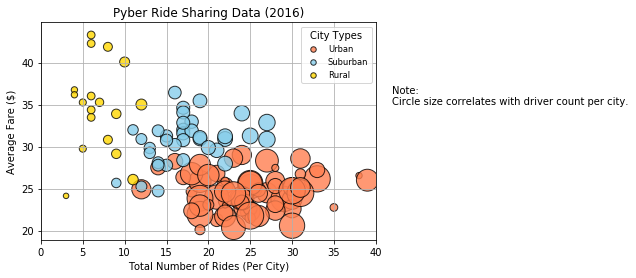

In [101]:
# Build the scatter plots for each city types
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c="Coral" , 
            edgecolor="black",linewidths=1, marker="o", 
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.xlim((0,40))
plt.grid(True)

# Incorporate a text label regarding circle size
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate the other graph properties
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("City_ride_Fig1.png")
    
# Show plot
plt.show()

## Total Fares by City Type

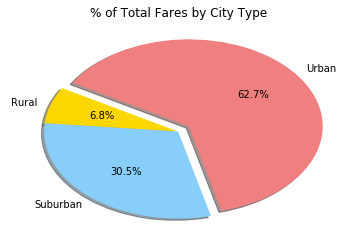

In [102]:
# Calculate Type Percents
type_percents = 100 * city_ride_data.groupby(["type"]).sum()["fare"] / city_ride_data["fare"].sum()

# Build Pie Chart
## Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]
## The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]
## Tells matplotlib to seperate the "Python" section from the others
explode = (0,0,0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(type_percents, labels = labels, colors = colors,explode = explode, autopct="%1.1f%%", shadow=True, startangle=150)
# Add pie chart title
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("City_ride_Fig2.png")

# Show Figure
plt.show()

## Total Rides by City Type

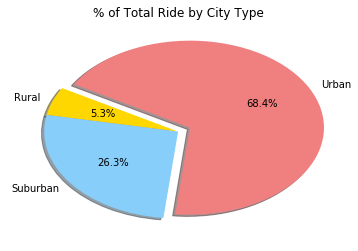

In [103]:
# Calculate Type Percents
type_percents = 100 * city_ride_data.groupby(["type"]).count()["ride_id"] / city_ride_data["ride_id"].count()

# Build Pie Chart
## Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]
## The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]
## Tells matplotlib to seperate the "Python" section from the others
explode = (0,0,0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(type_percents, labels = labels, colors = colors,explode = explode, autopct="%1.1f%%", shadow=True, startangle=150)
# Add pie chart title
plt.title("% of Total Ride by City Type")
# Save Figure
plt.savefig("City_ride_Fig3.png")

# Show Figure
plt.show()

## Total Drivers by City Type

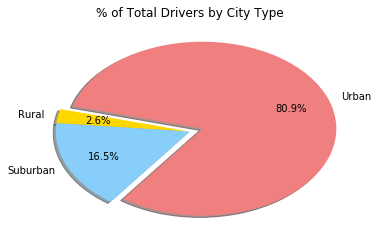

In [107]:
# Calculate Type Percents
type_percents = 100 * city_data.groupby(["type"]).sum()["driver_count"] / city_data["driver_count"].sum()

# Build Pie Chart
## Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]
## The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]
## Tells matplotlib to seperate the "Python" section from the others
explode = (0,0,0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(type_percents, labels = labels, colors = colors,explode = explode, autopct="%1.1f%%", shadow=True, pctdistance=0.70, startangle=165)
# Add pie chart title
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("City_ride_Fig4.png")

# Show Figure
plt.show()